In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, ParameterGrid
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Hyperparameter tuning

In [8]:
# load data
df = pd.read_csv('contraceptive_data.csv')

# set features to x variable
x = df[['wife_age', 'wife_edu', 'husband_edu', 'num_children', 'wife_religion', 'wife_working', 'husband_occupation',
       'standard_of_living_index', 'media_exposure']].values  

# set target classes to y variable
y = df['contraceptive_method'].values  

# convert target labels to categorical format
y = pd.get_dummies(y).values  # convert to one-hot encoded labels

# set random seed 42 for reproducibility
random_seed = 42

# split dataset into 80% training set and 20% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# parameters for grid search
gridsearch = {
    'C': [0.1, 1, 10, 100],  # penalty parameter C 
    'kernel': ['linear', 'rbf'],  # kernel type
    'gamma': ['scale', 'auto', 0.1, 1.0],  # kernel coefficient 
    'class_weight': [None, 'balanced'],  # class weights for imbalanced datasets
#    'shrinking': [True, False],  # Whether to use shrinking heuristics
#    'probability': [True, False],  # Whether to enable probability estimation
#    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for stopping criterion
#    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations for optimization
#    'cache_size': [100, 200, 300]  # Size of the kernel cache
}

# k fold for cross validation with 5 folds
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=random_seed)

# create variables to keep track of best accuracy, hyperparameters, and training time
best_accuracy = 0
best_params = None
total_training_time = 0

# cross validation with grid search for best hyperparameters
for params in ParameterGrid(gridsearch):
    print(f"Trying parameters: {params}")
    total_accuracy = 0  # initialize accuracy var for current set of hyperparameters
    
    for fold, (trainIdx, testIdx) in enumerate(skf.split(x_train, y_train.argmax(axis=1))):
        # split train and test data for each k fold
        x_train_fold = x_train[trainIdx]
        y_train_fold = np.argmax(y_train[trainIdx], axis=1)  # convert to 1D array
        x_val_fold = x_train[testIdx]
        y_val_fold = np.argmax(y_train[testIdx], axis=1)   # convert to 1D array

        # create svc model with current hyperparameters
        model = SVC(**params, random_state=random_seed)
        
        start_time = time.time()  # start recording time for training
        model.fit(x_train_fold, y_train_fold)  # train the model
        end_time = time.time()  # end time for training
        total_training_time += (end_time - start_time)  # get total training time

        # evaluation on the current fold
        accuracy = model.score(x_val_fold, y_val_fold)  # calculate accuracy
        total_accuracy += accuracy

        print(f'Fold {fold+1}, Accuracy: {accuracy}')

    avg_accuracy = total_accuracy / k_folds
    print(f"Average Accuracy for parameters {params}: {avg_accuracy}")

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_params = params

print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy}")
print(f"Average Training Time per fold: {total_training_time / (k_folds * len(ParameterGrid(gridsearch)))} seconds")


Trying parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Fold 1, Accuracy: 0.493368700265252
Fold 2, Accuracy: 0.53315649867374
Fold 3, Accuracy: 0.5358090185676393
Fold 4, Accuracy: 0.5251989389920424
Fold 5, Accuracy: 0.5398936170212766
Average Accuracy for parameters {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}: 0.52548535470399
Trying parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Fold 1, Accuracy: 0.46419098143236076
Fold 2, Accuracy: 0.4562334217506631
Fold 3, Accuracy: 0.48010610079575594
Fold 4, Accuracy: 0.46419098143236076
Fold 5, Accuracy: 0.4973404255319149
Average Accuracy for parameters {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}: 0.4724123821886111
Trying parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
Fold 1, Accuracy: 0.493368700265252
Fold 2, Accuracy: 0.53315649867374
Fold 3, Accuracy: 0.5358090185676393
Fold 4, Accurac

Fold 3, Accuracy: 0.649867374005305
Fold 4, Accuracy: 0.6472148541114059
Fold 5, Accuracy: 0.6675531914893617
Average Accuracy for parameters {'C': 1, 'class_weight': None, 'gamma': 0.1, 'kernel': 'rbf'}: 0.6369589141599412
Trying parameters: {'C': 1, 'class_weight': None, 'gamma': 1.0, 'kernel': 'linear'}
Fold 1, Accuracy: 0.4986737400530504
Fold 2, Accuracy: 0.519893899204244
Fold 3, Accuracy: 0.5464190981432361
Fold 4, Accuracy: 0.5278514588859416
Fold 5, Accuracy: 0.5398936170212766
Average Accuracy for parameters {'C': 1, 'class_weight': None, 'gamma': 1.0, 'kernel': 'linear'}: 0.5265463626615497
Trying parameters: {'C': 1, 'class_weight': None, 'gamma': 1.0, 'kernel': 'rbf'}
Fold 1, Accuracy: 0.7108753315649867
Fold 2, Accuracy: 0.726790450928382
Fold 3, Accuracy: 0.726790450928382
Fold 4, Accuracy: 0.7214854111405835
Fold 5, Accuracy: 0.7180851063829787
Average Accuracy for parameters {'C': 1, 'class_weight': None, 'gamma': 1.0, 'kernel': 'rbf'}: 0.7208053501890626
Trying parame

Fold 2, Accuracy: 0.4827586206896552
Fold 3, Accuracy: 0.5251989389920424
Fold 4, Accuracy: 0.5225464190981433
Fold 5, Accuracy: 0.5053191489361702
Average Accuracy for parameters {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}: 0.5084908854901518
Trying parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Fold 1, Accuracy: 0.6657824933687002
Fold 2, Accuracy: 0.7347480106100795
Fold 3, Accuracy: 0.7002652519893899
Fold 4, Accuracy: 0.7002652519893899
Fold 5, Accuracy: 0.7074468085106383
Average Accuracy for parameters {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}: 0.7017015632936396
Trying parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'linear'}
Fold 1, Accuracy: 0.506631299734748
Fold 2, Accuracy: 0.4827586206896552
Fold 3, Accuracy: 0.5251989389920424
Fold 4, Accuracy: 0.5225464190981433
Fold 5, Accuracy: 0.5053191489361702
Average Accuracy for parameters {'C': 10, 'class_w

Fold 3, Accuracy: 0.7506631299734748
Fold 4, Accuracy: 0.7241379310344828
Fold 5, Accuracy: 0.7313829787234043
Average Accuracy for parameters {'C': 100, 'class_weight': 'balanced', 'gamma': 1.0, 'kernel': 'rbf'}: 0.7303614763812856
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 1.0, 'kernel': 'rbf'}, Best Accuracy: 0.7340721824030702
Average Training Time per fold: 0.9481374986469746 seconds


# Train model

Fold 1/5:
Accuracy: 0.7321
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       161
           1       0.78      0.48      0.60        83
           2       0.76      0.70      0.73       133

    accuracy                           0.73       377
   macro avg       0.75      0.69      0.70       377
weighted avg       0.74      0.73      0.72       377

Confusion Matrix:
[[143   3  15]
 [ 28  40  15]
 [ 32   8  93]]
--------------------------------------------------
Fold 2/5:
Accuracy: 0.7241
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       161
           1       0.74      0.52      0.61        83
           2       0.72      0.75      0.74       133

    accuracy                           0.72       377
   macro avg       0.73      0.69      0.70       377
weighted avg       0.73      0.72      0.72       377

Confusion Matrix:
[[130

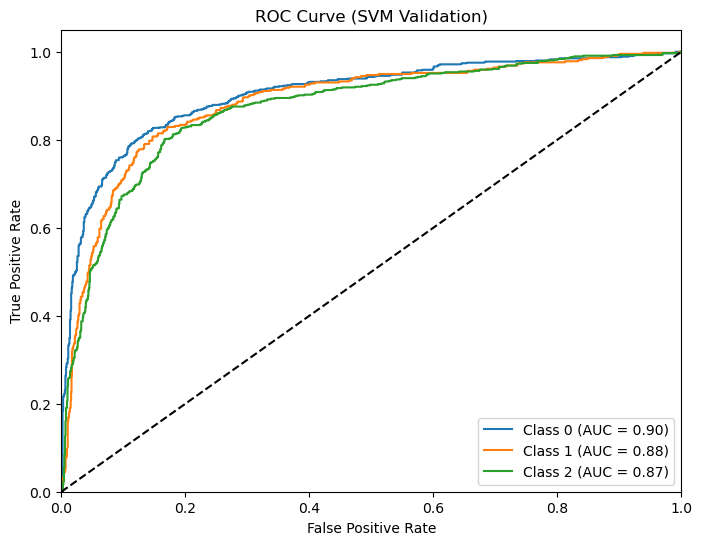

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# random seed for reproducibility
np.random.seed(42)

# convert to 1D array
y_train_multiclass = np.argmax(y_train, axis=1)

# create the SVM model with the best parameters from grid search
model = SVC(C=1, class_weight='balanced', gamma=1.0, kernel='rbf', probability=True)

# num of folds for kfold cross validation
num_folds = 5

# create lists to track performance results
accuracies = []
classification_reports = []
confusion_matrices = []
all_y_true = []
all_y_prob = []

# create stratified kfold iterator
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

# kfold cross validation
for fold, (train_idx, test_idx) in enumerate(skf.split(x_train, y_train_multiclass), 1):
    print(f'Fold {fold}/{num_folds}:')
    
    # split data into train and validation sets per fold
    x_train_fold, x_val_fold = x_train[train_idx], x_train[test_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[test_idx]
    
    # train the SVM model
    model.fit(x_train_fold, y_train_multiclass[train_idx])
    
    # get predictions on the validation data
    y_pred = model.predict(x_val_fold)
    
    # get accuracy
    accuracy = accuracy_score(y_train_multiclass[test_idx], y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    accuracies.append(accuracy)
    
    # create classification report
    classification_report_str = classification_report(y_train_multiclass[test_idx], y_pred)
    print('Classification Report:')
    print(classification_report_str)
    #classification_reports.append(classification_report_str)
    
    # create confusion matrix
    confusion_matrix_arr = confusion_matrix(y_train_multiclass[test_idx], y_pred)
    print('Confusion Matrix:')
    print(confusion_matrix_arr)
    confusion_matrices.append(confusion_matrix_arr) # append fold's confusion matrix to the list
    
    # store values for roc curve
    all_y_true.extend(y_train_multiclass[test_idx])
    y_prob = model.predict_proba(x_val_fold)
    all_y_prob.extend(y_prob)
    
    print('-' * 50)

# disokay average performance results across all folds
print('Average Evaluation Metrics Across Folds:')
print(f'Average Accuracy: {np.mean(accuracies):.4f}')
print('Average Confusion Matrix:')
print(np.mean(confusion_matrices, axis=0))

# convert lists to arrays
all_y_true = np.array(all_y_true)
all_y_prob = np.array(all_y_prob)

# code reference: https://ai.stackexchange.com/questions/42091/roc-curve-for-multiclassification-results-sound-not-correct    
# https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem
# get roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_train.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(all_y_true == i, all_y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot roc curve
plt.figure(figsize=(8, 6))
for i in range(y_train.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM Validation)')
plt.legend(loc="lower right")
plt.show()

    


## Confusion matrix for validation

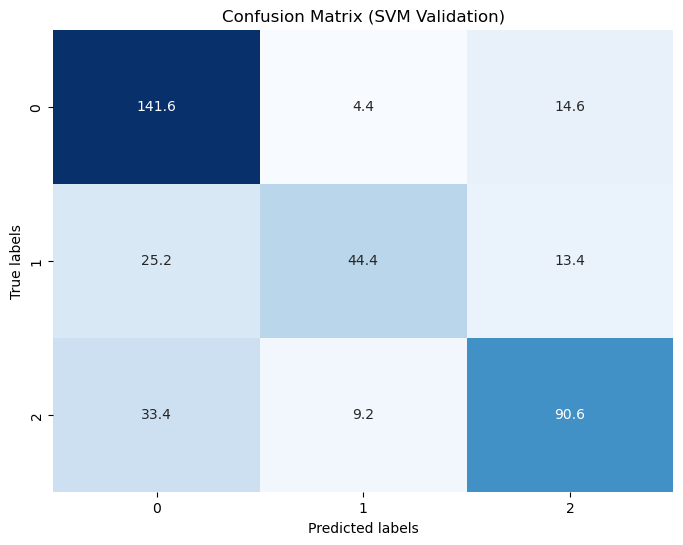

In [11]:
import seaborn as sns

# create average confusion matrix
avg_confusion_matrix = np.mean(confusion_matrices, axis=0)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(avg_confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (SVM Validation)')
plt.show()

# Test model

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# convert to 1D array
y_test_labels = np.argmax(y_test, axis=1)

# test the SVM model
model.fit(x_test, y_test_labels)

# make predictions on the test data
y_pred_test = model.predict(x_test)

# get accuracy
accuracy_test = accuracy_score(y_test_labels, y_pred_test)
print("Accuracy on Testing Data:", accuracy_test)

# create classification report for testing data
print("Classification Report on Testing Data:")
print(classification_report(y_test_labels, y_pred_test))

# create confusion matrix for testing data
print("Confusion Matrix on Testing Data:")
print(confusion_matrix(y_test_labels, y_pred_test))


Accuracy on Testing Data: 0.989406779661017
Classification Report on Testing Data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       195
           1       0.96      0.99      0.98       109
           2       0.99      0.98      0.99       168

    accuracy                           0.99       472
   macro avg       0.99      0.99      0.99       472
weighted avg       0.99      0.99      0.99       472

Confusion Matrix on Testing Data:
[[194   1   0]
 [  0 108   1]
 [  0   3 165]]


## ROC Curve for testing

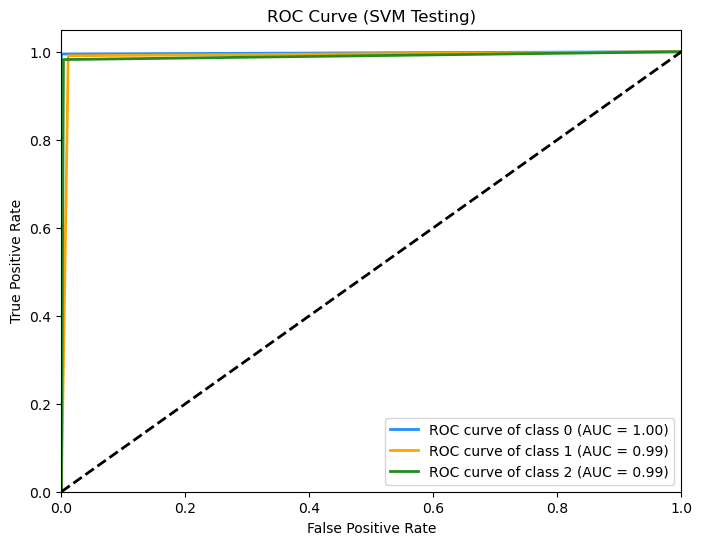

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# get predicted probabilities for the classes
y_score = model.predict_proba(x_test)

# code reference: https://ai.stackexchange.com/questions/42091/roc-curve-for-multiclassification-results-sound-not-correct    
# https://stackoverflow.com/questions/70278059/plotting-the-roc-curve-for-a-multiclass-problem
# create roc curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test_labels))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_labels == i, y_pred_test == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot
plt.figure(figsize=(8, 6))
colors = cycle(['dodgerblue', 'orange', 'forestgreen'])  
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM Testing)')
plt.legend(loc='lower right')
plt.show()


# Confusion matrix for testing

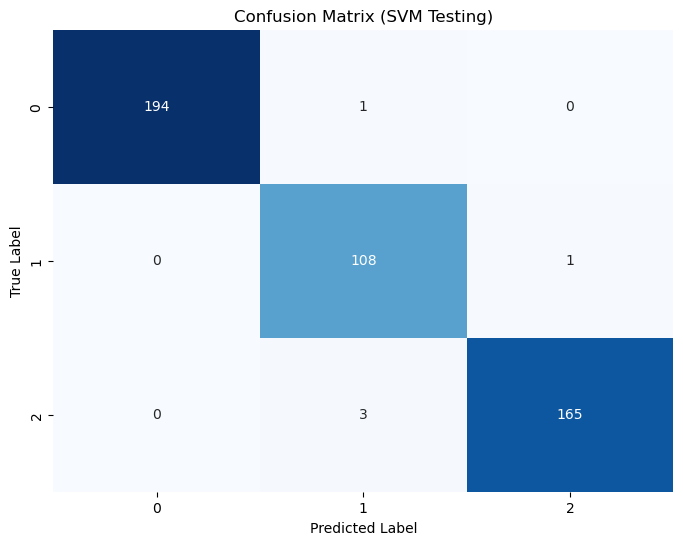

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# get confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_test)

# plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (SVM Testing)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

plt.show()

In [27]:
import joblib

# Save the trained SVM model using joblib
joblib.dump(model, 'final_svm_model.pkl')

['final_svm_model.pkl']

In [29]:
import pandas as pd

x_test_df = pd.DataFrame(x_test)
y_test_df = pd.DataFrame(y_test_labels)

x_test_df.to_csv('svm_x_test.csv', index=False)
y_test_df.to_csv('svm_y_test.csv', index=False)

### Go to testing_reproducibility.ipynb to reproduce test results